<a href="https://colab.research.google.com/github/ricardoaued/datascience/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *New York*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de New York, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [2]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2021-12-04/visualisations/listings.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Análise dos Dados


**Dicionário das variáveis**

* id - número de id gerado para identificar o imóvel
* host_id - número de id do proprietário(anfitrião) da propriedade
* host_name - Nome do anfitrião
* neighbourhood_group - esta coluna não contém nenhum valor válido
* neighbourhood - nome do bairro
* latitude - coordenada da latitudade da propriedade 
* longitude - coordenada da longitude da propriedade
* room_type - informa o tipo de quarto que é oferecido
* price - preço para alugar o imóvel
* minimum_nights - quantidade mínima de noites para reservar
* number_of_review - data do útlimo review
* last_review - data do último review
* reviews_per_month - quantidade de reviews por mes 
* calculated_host_listing_count - quantidade de imóveis do mesmo anfitrião
* availability_365 - número de dias de disponibilidade dentro de 365 dias


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [5]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,2019-11-04,0.33,3,338,0,NaN
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,Entire home/apt,75,1,409,2021-10-22,4.86,1,194,32,NaN
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2016-06-05,0.52,2,365,0,NaN
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,5,2,2021-08-08,0.02,1,123,1,NaN
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,507,2021-11-08,3.68,1,192,33,NaN


In [27]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [32]:
# identificar o volume de dados do DataFrame
df.info()

# verificar as 5 primeiras entradas do dataset
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38277 entries, 0 to 38276
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38277 non-null  int64  
 1   name                            38264 non-null  object 
 2   host_id                         38277 non-null  int64  
 3   host_name                       38243 non-null  object 
 4   neighbourhood_group             38277 non-null  object 
 5   neighbourhood                   38277 non-null  object 
 6   latitude                        38277 non-null  float64
 7   longitude                       38277 non-null  float64
 8   room_type                       38277 non-null  object 
 9   price                           38277 non-null  int64  
 10  minimum_nights                  38277 non-null  int64  
 11  number_of_reviews               38277 non-null  int64  
 12  last_review                     

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,2019-11-04,0.33,3,338,0,NaN
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,Entire home/apt,75,1,409,2021-10-22,4.86,1,194,32,NaN
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2016-06-05,0.52,2,365,0,NaN
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,5,2,2021-08-08,0.02,1,123,1,NaN
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,507,2021-11-08,3.68,1,192,33,NaN


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [64]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
print(df.isnull().sum())

id                                    0
name                                 13
host_id                               0
host_name                            34
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        9504
reviews_per_month                  9504
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           38276
dtype: int64


### **Q3. Qual o tipo de distribuição das variáveis?** 

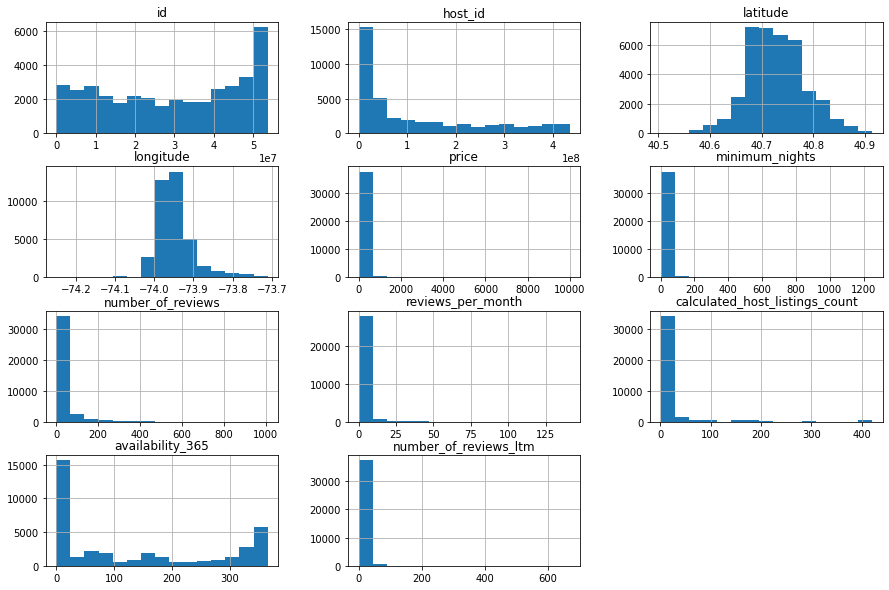

In [6]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Interpretando Outliers**



In [7]:
### **Interpretando Outliers**

# ver resumo estatísticas das variáveis númericas

df[['price','minimum_nights','number_of_reviews', 'reviews_per_month' ,'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,38277.000000,38277.000000,38277.000000,28773.000000,38277.000000,38277.000000
mean,170.858714,21.623769,23.302871,1.721019,17.747655,134.290984
std,305.100271,29.573333,50.415484,4.399826,59.150451,143.196175
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,70.000000,3.000000,1.000000,0.120000,1.000000,0.000000
50%,114.000000,30.000000,4.000000,0.480000,1.000000,73.000000
75%,189.000000,30.000000,20.000000,1.780000,3.000000,302.000000
max,10000.000000,1250.000000,1009.000000,141.000000,421.000000,365.000000


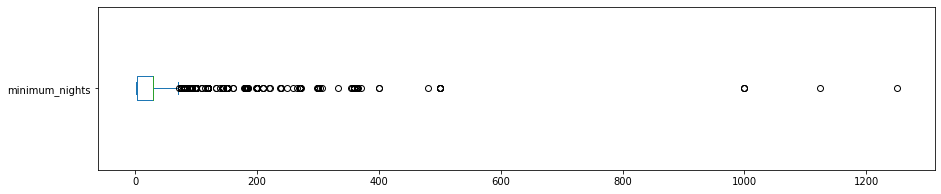

minimum_nights: valores acima de 30
1428 entradas
3.7307%


In [11]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30])/ df.shape[0]*100)))


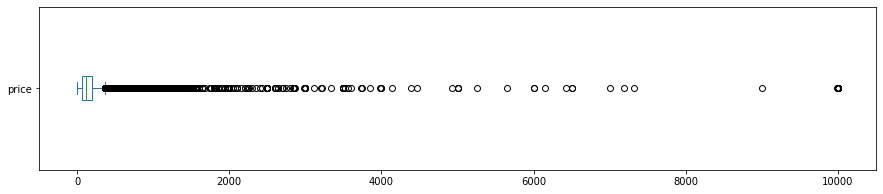

price: valores acima de 1500
37663 entrada
4.1539%


In [14]:
# Boxblot para price

#price 
df.price.plot(kind ='box', vert=False, figsize=(15,3))
plt.show()

#ver quantidade de valores acima de 1500 para price
print("price: valores acima de 1500")
print("{} entrada".format(len(df[df.price >30 ])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0]*1000)))


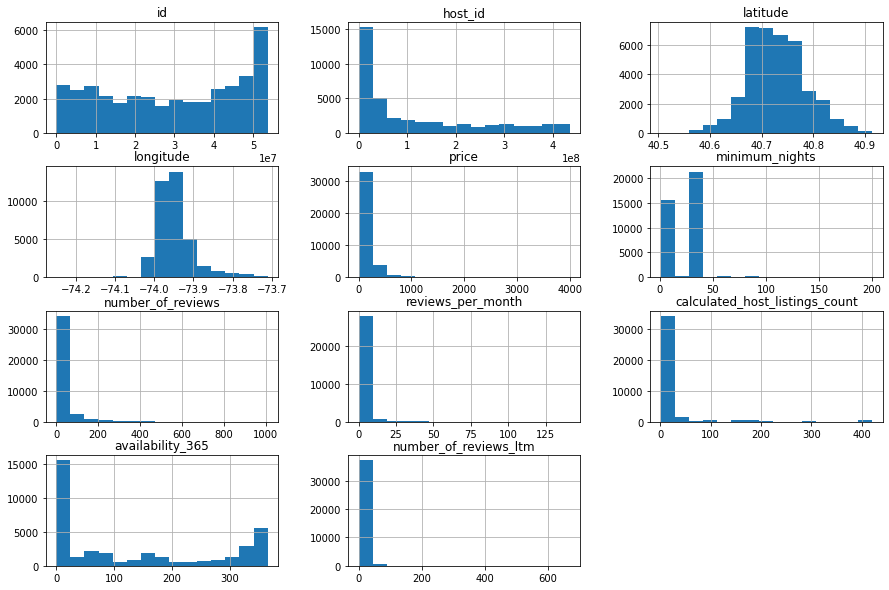

In [22]:
# remover os outliers em um novo DataFrame

df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price>4000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 200].index, axis=0, inplace=True)

# remover 'neighbourhood_group', pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize= (15,10));




### **Q4. Qual a média dos preços de aluguel?**

### **Q4. Qual a correlação existente entre as variáveis**

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.102047,-0.040026,0.022214,-0.015408,0.112241
minimum_nights,-0.102047,1.000000,-0.209603,-0.274239,0.154077,-0.083274
number_of_reviews,-0.040026,-0.209603,1.000000,0.277078,-0.107931,0.097961
reviews_per_month,0.022214,-0.274239,0.277078,1.000000,0.011301,0.143138
calculated_host_listings_count,-0.015408,0.154077,-0.107931,0.011301,1.000000,0.212572
availability_365,0.112241,-0.083274,0.097961,0.143138,0.212572,1.000000


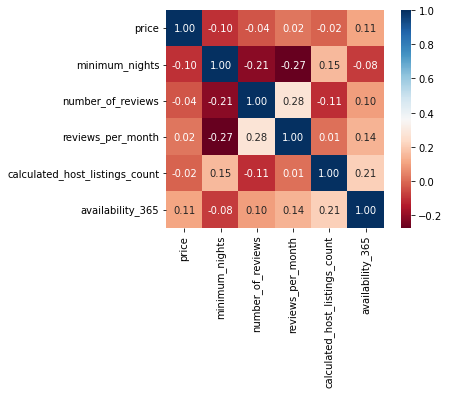

In [37]:
# criar uma matriz de correlação

corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()

display(corr)


# mostrar a matriz de correlação

sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [38]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    20307
Private room       17013
Shared room          568
Hotel room           210
Name: room_type, dtype: int64

In [47]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() /df_clean.shape[0]

Entire home/apt    0.533020
Private room       0.446559
Shared room        0.014909
Hotel room         0.005512
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [53]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Fort Wadsworth       800.000000
Jamaica Estates      429.111111
Riverdale            406.777778
Tribeca              406.507246
Flatiron District    402.328767
Theater District     378.472527
Midtown              326.642503
SoHo                 303.736000
Neponsit             295.000000
Greenwich Village    281.375546
Name: price, dtype: float64

In [57]:
# ver quantidade de imóveis no Fort Wadswroth
print(df_clean[df_clean.neighbourhood == "Jamaica Estates"].shape)

df_clean[df_clean.neighbourhood == "Jamaica Estates"]





(27, 17)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
3418,4430808,Private Studio Near Queens Hosp & St. John's U...,23002099,Sol,Jamaica Estates,40.72005,-73.80164,Entire home/apt,89,7,213,2021-06-24,2.54,1,70,3,NaN
4503,6079079,4 BEDROOMS HOUSE STEPS TO ST JOHNS UNIVERSITY,30214562,Sharon,Jamaica Estates,40.72574,-73.78878,Entire home/apt,175,7,38,2017-06-28,0.50,1,76,0,NaN
8488,11656721,3 bedroom near Park,46502890,Jackie,Jamaica Estates,40.72191,-73.78207,Private room,750,30,0,NaN,NaN,2,0,0,NaN
11480,16604112,Cozy Private room in the heart of Jamaica New ...,109527682,Stella,Jamaica Estates,40.71320,-73.78601,Private room,90,1,20,2019-09-17,0.73,1,177,0,NaN
14840,22178073,Tranquility Stay-cation with private pool,21963202,Journey,Jamaica Estates,40.71758,-73.78650,Private room,305,1,384,2021-11-28,14.12,2,346,100,NaN
15678,23667137,Safe Area Huge Room/ELECTRIC MASSAGE BED QUEEN...,115151548,Beethoven,Jamaica Estates,40.71570,-73.77634,Private room,72,30,6,2018-07-02,0.13,1,364,0,NaN
16597,25887684,Gorgeous Two Br Apt in Jamaica Estates.,194520886,Nazma,Jamaica Estates,40.71258,-73.78952,Entire home/apt,100,30,25,2019-12-08,0.65,1,323,0,NaN
17361,27552868,Pool Day Pass only from 3 to 9 pm,21963202,Journey,Jamaica Estates,40.71888,-73.78828,Entire home/apt,800,1,1,2021-01-01,0.09,2,346,1,NaN
17853,28587071,Private Bedroom in Queens at St. John's Univer...,215759678,Andrew,Jamaica Estates,40.72100,-73.79767,Private room,45,5,75,2021-08-04,2.05,7,332,16,NaN
19931,32531409,"Luxury home, 2700 sq ft, 20 m to airports/City...",168814318,Misha,Jamaica Estates,40.71891,-73.78212,Entire home/apt,364,4,48,2021-11-08,1.83,1,161,12,NaN


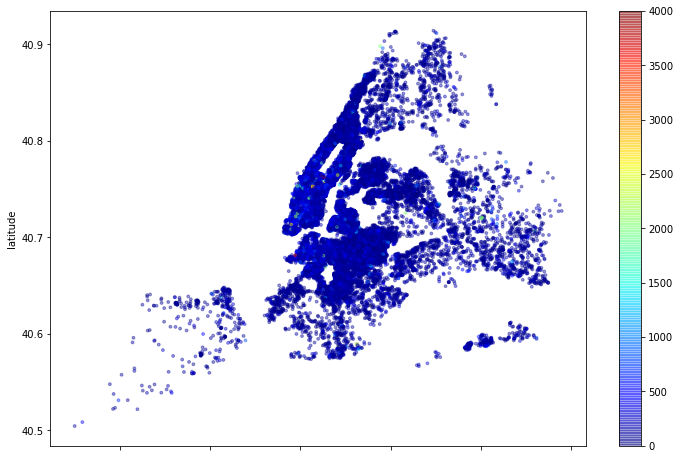

In [60]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4 , c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [63]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

20.288676570948606

## Conclusões




Importando observar 
1. Os bairros mais caros não são realmente caros na média, pois tem poucas resistencias nesses bairros. Ex: Fort Hadsworth tem apenas 1 moradia de 800 de média. 

2. 
